In [1]:
import pandas as pd


crashes_df = pd.read_csv("Resources\Road_Crashes_for_five_Years_Victoria.csv")
crashes_df.head()

,X,Y,OBJECTID,ACCIDENT_NO,ABS_CODE,ACCIDENT_STATUS,ACCIDENT_DATE,ACCIDENT_TIME,ALCOHOLTIME,ACCIDENT_TYPE,...,DEG_URBAN_ALL,LGA_NAME_ALL,REGION_NAME_ALL,SRNS,SRNS_ALL,RMA,RMA_ALL,DIVIDED,DIVIDED_ALL,STAT_DIV_NAME
0,2444652.517,2369157.816,1,T20150013818,ABS to receive accident,Finished,1/07/2015,05:15:00+00,Yes,Collision with a fixed object,...,LARGE_PROVINCIAL_CITIES,GEELONG,SOUTH WESTERN REGION,NaN,NaN,Local Road,Local Road,Undivided,Undivided,Country
1,2507053.522,2427188.691,2,T20150013844,ABS to receive accident,Finished,1/07/2015,11:30:00+00,No,Collision with a fixed object,...,MELB_URBAN,WHITTLESEA,METROPOLITAN NORTH WEST REGION,C,C,Arterial Other,"Arterial Other,Local Road",Divided,"Undivided,Divided",Metro
2,2490706.473,2409439.682,3,T20150013854,ABS to receive accident,Finished,1/07/2015,13:40:00+00,No,Collision with vehicle,...,MELB_URBAN,MARIBYRNONG,METROPOLITAN NORTH WEST REGION,NaN,NaN,Local Road,Local Road,Undivided,Undivided,Metro
3,2524370.961,2379929.797,4,T20150013897,Non ABS accident,Finished,2/07/2015,10:31:00+00,No,Struck Pedestrian,...,MELB_URBAN,CASEY,METROPOLITAN SOUTH EAST REGION,NaN,NaN,NaN,NaN,NaN,NaN,Metro
4,2346439.879,2385852.164,5,T20150013907,ABS to receive accident,Finished,2/07/2015,10:25:00+00,No,Vehicle overturned (no collision),...,RURAL_VICTORIA,CORANGAMITE,SOUTH WESTERN REGION,C,C,Arterial Other,Arterial Other,Undivided,Undivided,Country


In [2]:
crashes_cleaned_df = crashes_df.drop(columns=["X", "Y", "SRNS", "SRNS_ALL", "PED_CYCLIST_13_18", "PED_CYCLIST_5_12", "UNKNOWN", "PEDESTRIAN", "DRIVER", "PASSENGER", "BICYCLIST", "VICGRID_X", "VICGRID_Y", "NODE_ID", "OBJECTID", "ACCIDENT_NO", "ABS_CODE"])

In [3]:
crashes_cleaned_df.head()

,ACCIDENT_STATUS,ACCIDENT_DATE,ACCIDENT_TIME,ALCOHOLTIME,ACCIDENT_TYPE,DAY_OF_WEEK,DCA_CODE,HIT_RUN_FLAG,LIGHT_CONDITION,POLICE_ATTEND,...,PUBLICVEHICLE,DEG_URBAN_NAME,DEG_URBAN_ALL,LGA_NAME_ALL,REGION_NAME_ALL,RMA,RMA_ALL,DIVIDED,DIVIDED_ALL,STAT_DIV_NAME
0,Finished,1/07/2015,05:15:00+00,Yes,Collision with a fixed object,4,OTHER ACCIDENTS ON CURVE NOT INCLUDED IN DCAs ...,No,Dark Street lights on,Yes,...,0.0,LARGE_PROVINCIAL_CITIES,LARGE_PROVINCIAL_CITIES,GEELONG,SOUTH WESTERN REGION,Local Road,Local Road,Undivided,Undivided,Country
1,Finished,1/07/2015,11:30:00+00,No,Collision with a fixed object,4,LEFT OFF CARRIAGEWAY INTO OBJECT/PARKED VEHICLE,No,Day,Yes,...,0.0,MELB_URBAN,MELB_URBAN,WHITTLESEA,METROPOLITAN NORTH WEST REGION,Arterial Other,"Arterial Other,Local Road",Divided,"Undivided,Divided",Metro
2,Finished,1/07/2015,13:40:00+00,No,Collision with vehicle,4,CROSS TRAFFIC(INTERSECTIONS ONLY),No,Day,Yes,...,0.0,MELB_URBAN,MELB_URBAN,MARIBYRNONG,METROPOLITAN NORTH WEST REGION,Local Road,Local Road,Undivided,Undivided,Metro
3,Finished,2/07/2015,10:31:00+00,No,Struck Pedestrian,5,ANY MANOEUVRE INVOLVING PED NOT INCLUDED IN DC...,Yes,Day,No,...,0.0,MELB_URBAN,MELB_URBAN,CASEY,METROPOLITAN SOUTH EAST REGION,NaN,NaN,NaN,NaN,Metro
4,Finished,2/07/2015,10:25:00+00,No,Vehicle overturned (no collision),5,OFF CARRIAGEWAY TO RIGHT,No,Day,Yes,...,0.0,RURAL_VICTORIA,RURAL_VICTORIA,CORANGAMITE,SOUTH WESTERN REGION,Arterial Other,Arterial Other,Undivided,Undivided,Country


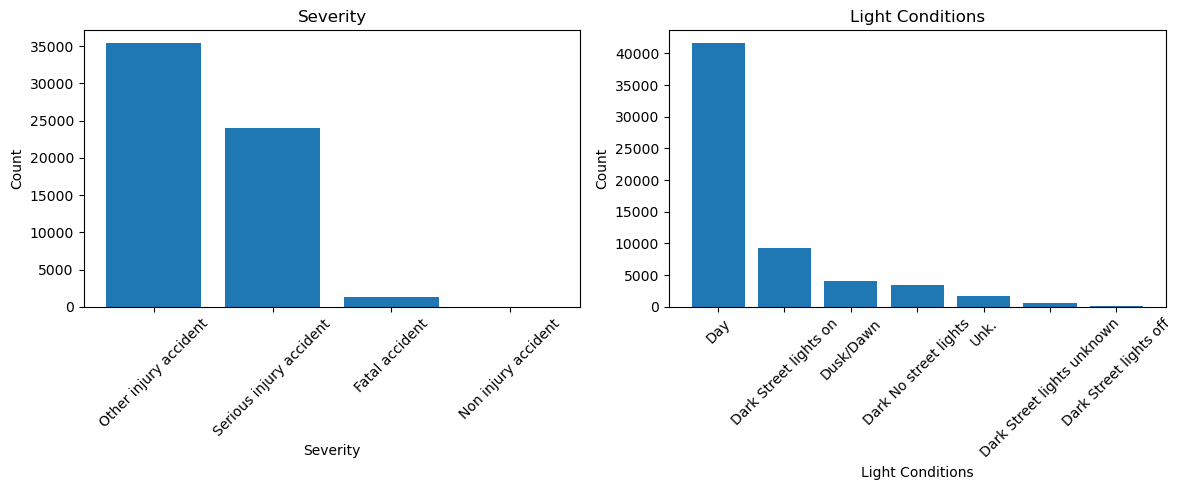

In [5]:
from itertools import product
import matplotlib.pyplot as plt

# Create two dataframes for severity and light conditions
severity_data = crashes_cleaned_df['SEVERITY'].value_counts().reset_index()
light_conditions_data = crashes_cleaned_df['LIGHT_CONDITION'].value_counts().reset_index()

# # Rename columns
severity_data.columns = ['Severity', 'Count']
light_conditions_data.columns = ['Light Condition', 'Count']
 
# Plot the composite bar charts
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Bar chart for Severity
axes[0].bar(severity_data['Severity'], severity_data['Count'])
axes[0].set_title("Severity")
axes[0].set_xlabel("Severity")
axes[0].set_ylabel("Count")
axes[0].tick_params(axis='x', rotation=45)

# Bar chart for Light Conditions
axes[1].bar(light_conditions_data['Light Condition'], light_conditions_data['Count'])
axes[1].set_title("Light Conditions")
axes[1].set_xlabel("Light Conditions")
axes[1].set_ylabel("Count")
axes[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()


In [8]:
# Group the data by 'severity' and count 'LIGHT_CONDITION'
grouped_data = crashes_cleaned_df.groupby('SEVERITY')['LIGHT_CONDITION'].value_counts().unstack(fill_value=0).reset_index()
# Display the result
print(grouped_data)

LIGHT_CONDITION                 SEVERITY  Dark No street lights  \
0                         Fatal accident                    200   
1                    Non injury accident                      0   
2                  Other injury accident                   1586   
3                Serious injury accident                   1619   

LIGHT_CONDITION  Dark Street lights off  Dark Street lights on  \
0                                     2                    187   
1                                     0                      0   
2                                    71                   5132   
3                                    63                   3937   

LIGHT_CONDITION  Dark Street lights unknown    Day  Dusk/Dawn  Unk.  
0                                        11    785         70    19  
1                                         0      2          0     0  
2                                       414  24384       2454  1317  
3                                       176  16384   

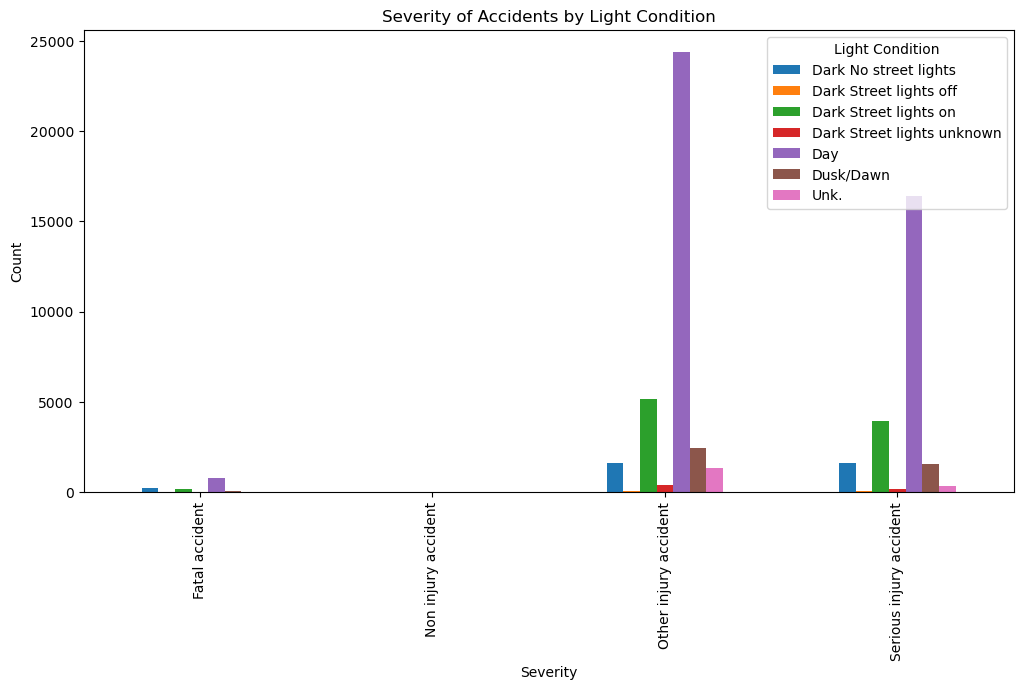

In [9]:
# Plot the grouped bar graph
ax = grouped_data.plot(x='SEVERITY', kind='bar', stacked=False, figsize=(12, 6))

# Customize the plot
ax.set_title("Severity of Accidents by Light Condition")
ax.set_xlabel("Severity")
ax.set_ylabel("Count")
ax.legend(title='Light Condition', loc='upper right')

# Show the plot
plt.show()

In [6]:
# Group the data by 'region_name_all' and count 'ALCOHOL_RELATED' occurrences
grouped_data = crashes_cleaned_df.groupby('REGION_NAME_ALL')['ALCOHOL_RELATED'].value_counts().unstack(fill_value=0).reset_index()

# Rename the columns if needed
grouped_data.rename(columns={1: 'Yes', 0: 'No'}, inplace=True)

# Display the result
print(grouped_data)

ALCOHOL_RELATED                                    REGION_NAME_ALL     No  Yes
0                                    EASTERN REGION,EASTERN REGION   3426  179
1                EASTERN REGION,EASTERN REGION,METROPOLITAN SOU...     17    0
2                EASTERN REGION,EASTERN REGION,NORTH EASTERN RE...      2    0
3                EASTERN REGION,METROPOLITAN SOUTH EAST REGION,...      1    0
4                                   METROPOLITAN NORTH WEST REGION  20317  472
5                METROPOLITAN NORTH WEST REGION,METROPOLITAN SO...      1    0
6                                   METROPOLITAN SOUTH EAST REGION  20422  635
7                METROPOLITAN SOUTH EAST REGION,METROPOLITAN NO...    162    2
8                                             NORTH EASTERN REGION   3466  134
9                NORTH EASTERN REGION,METROPOLITAN NORTH WEST R...      1    0
10               NORTH EASTERN REGION,METROPOLITAN SOUTH EAST R...     10    1
11                            NORTH EASTERN REGION,N

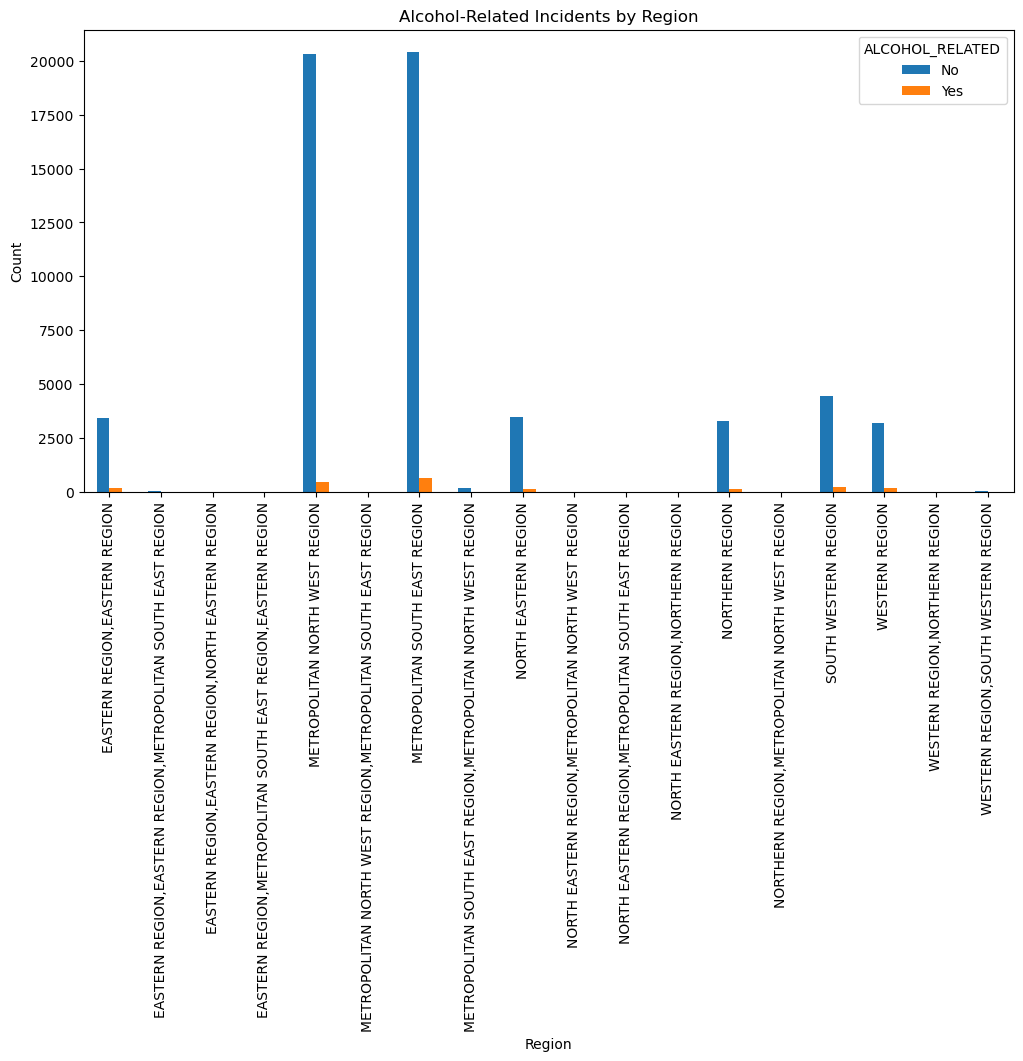

In [7]:
# Plot the grouped bar graph
ax = grouped_data.plot(x='REGION_NAME_ALL', kind='bar', stacked=False, figsize=(12, 6))

# Customize the plot
ax.set_title("Alcohol-Related Incidents by Region")
ax.set_xlabel("Region")
ax.set_ylabel("Count")
ax.legend(title='ALCOHOL_RELATED', loc='upper right')

# Show the plot
plt.show()


In [10]:
# Group the data by 'severity' and count of 'ROAD_GEOMETRY'

grouped_data = crashes_cleaned_df.groupby('SEVERITY')['ROAD_GEOMETRY'].value_counts().unstack(fill_value=0).reset_index()
# Display the result
print(grouped_data)


ROAD_GEOMETRY                 SEVERITY  Cross intersection  Dead end  \
0                       Fatal accident                 140         2   
1                  Non injury accident                   0         0   
2                Other injury accident                7994        49   
3              Serious injury accident                4611        33   

ROAD_GEOMETRY  Multiple intersection  Not at intersection  Private property  \
0                                 15                  875                35   
1                                  1                    1                 0   
2                                706                17830               417   
3                                453                13280               253   

ROAD_GEOMETRY  Road closure  T intersection  Unknown  Y intersection  
0                         0             164       43               0  
1                         0               0        0               0  
2                         1   

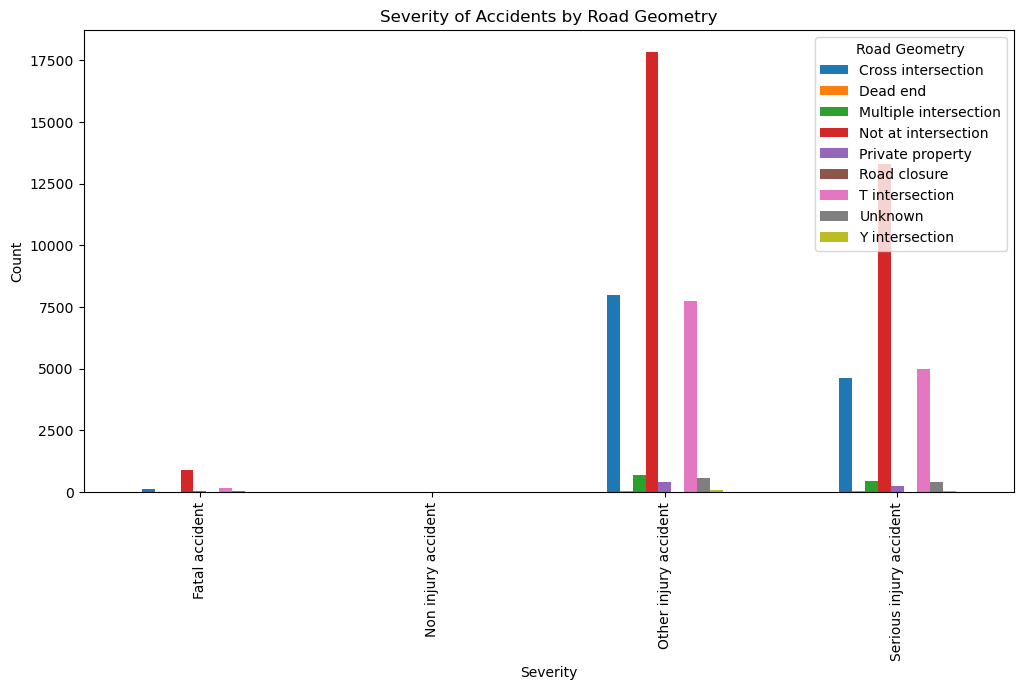

In [11]:
# Plot the grouped bar graph
ax = grouped_data.plot(x='SEVERITY', kind='bar', stacked=False, figsize=(12, 6))

# Customize the plot
ax.set_title("Severity of Accidents by Road Geometry")
ax.set_xlabel("Severity")
ax.set_ylabel("Count")
ax.legend(title='Road Geometry', loc='upper right')

# Show the plot
plt.show()